# Creating Widgets from Functions - Part 2

In this notebook, we show a few extra widget options that can be created with [magicgui](https://napari.org/magicgui/).

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
from magicgui import magicgui
import napari
from napari.utils import nbscreenshot
from napari.types import ImageData, LabelsData

## Creating widgets from external functions

We can also import annotated functions from a python file and make widgets from them.

In [2]:
from my_module import segment_image

**Take a look at the local package my_module.py to check the function annotations.**

We start by opening the blobs image and displaying it in napari.

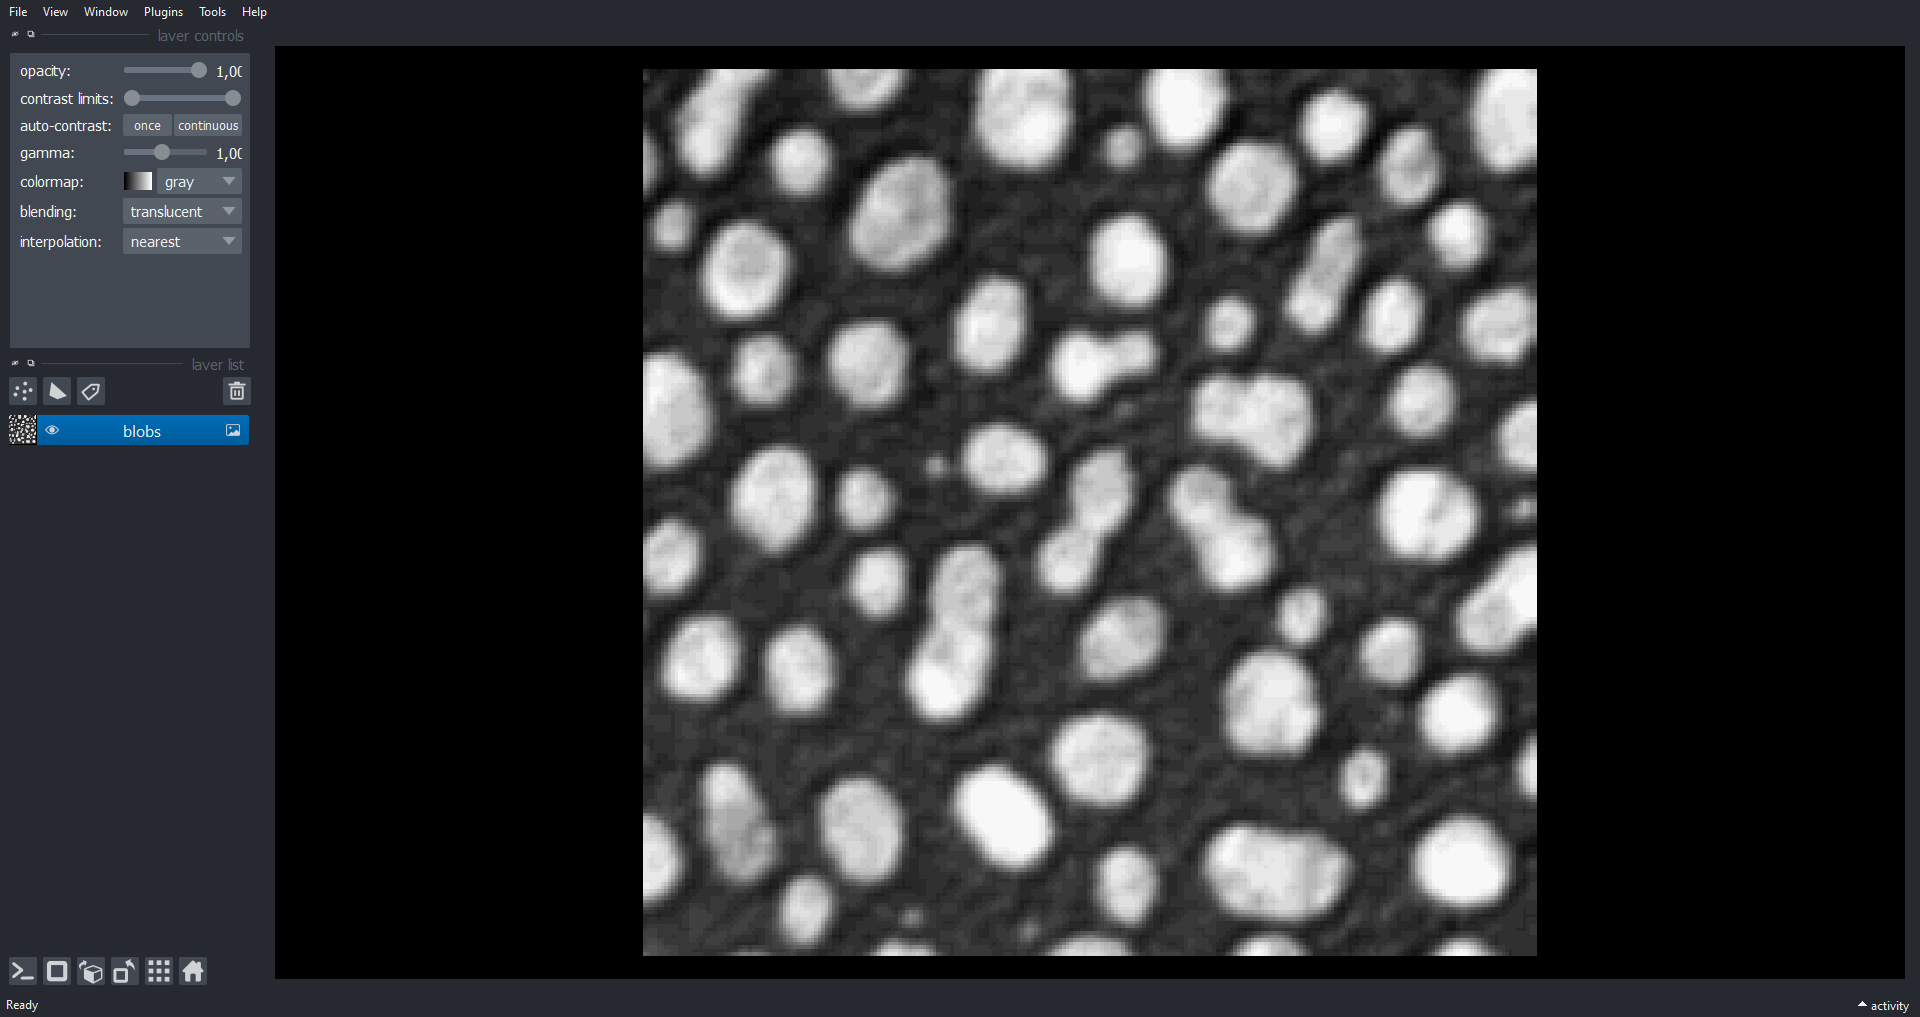

In [3]:
image = imread("../../data/blobs.tif") # Read image
viewer = napari.Viewer() # Open napari Viewer
viewer.add_image(image, name = 'blobs') # Add image layer to napari
nbscreenshot(viewer) # Make a screenshot of napari

Because our functions are already properly annotated in the my_module.py python file, we can direclty create a widget from them with magicgui and add this widget to napari.

*Reminder: this would only work if the function is properly annotated*

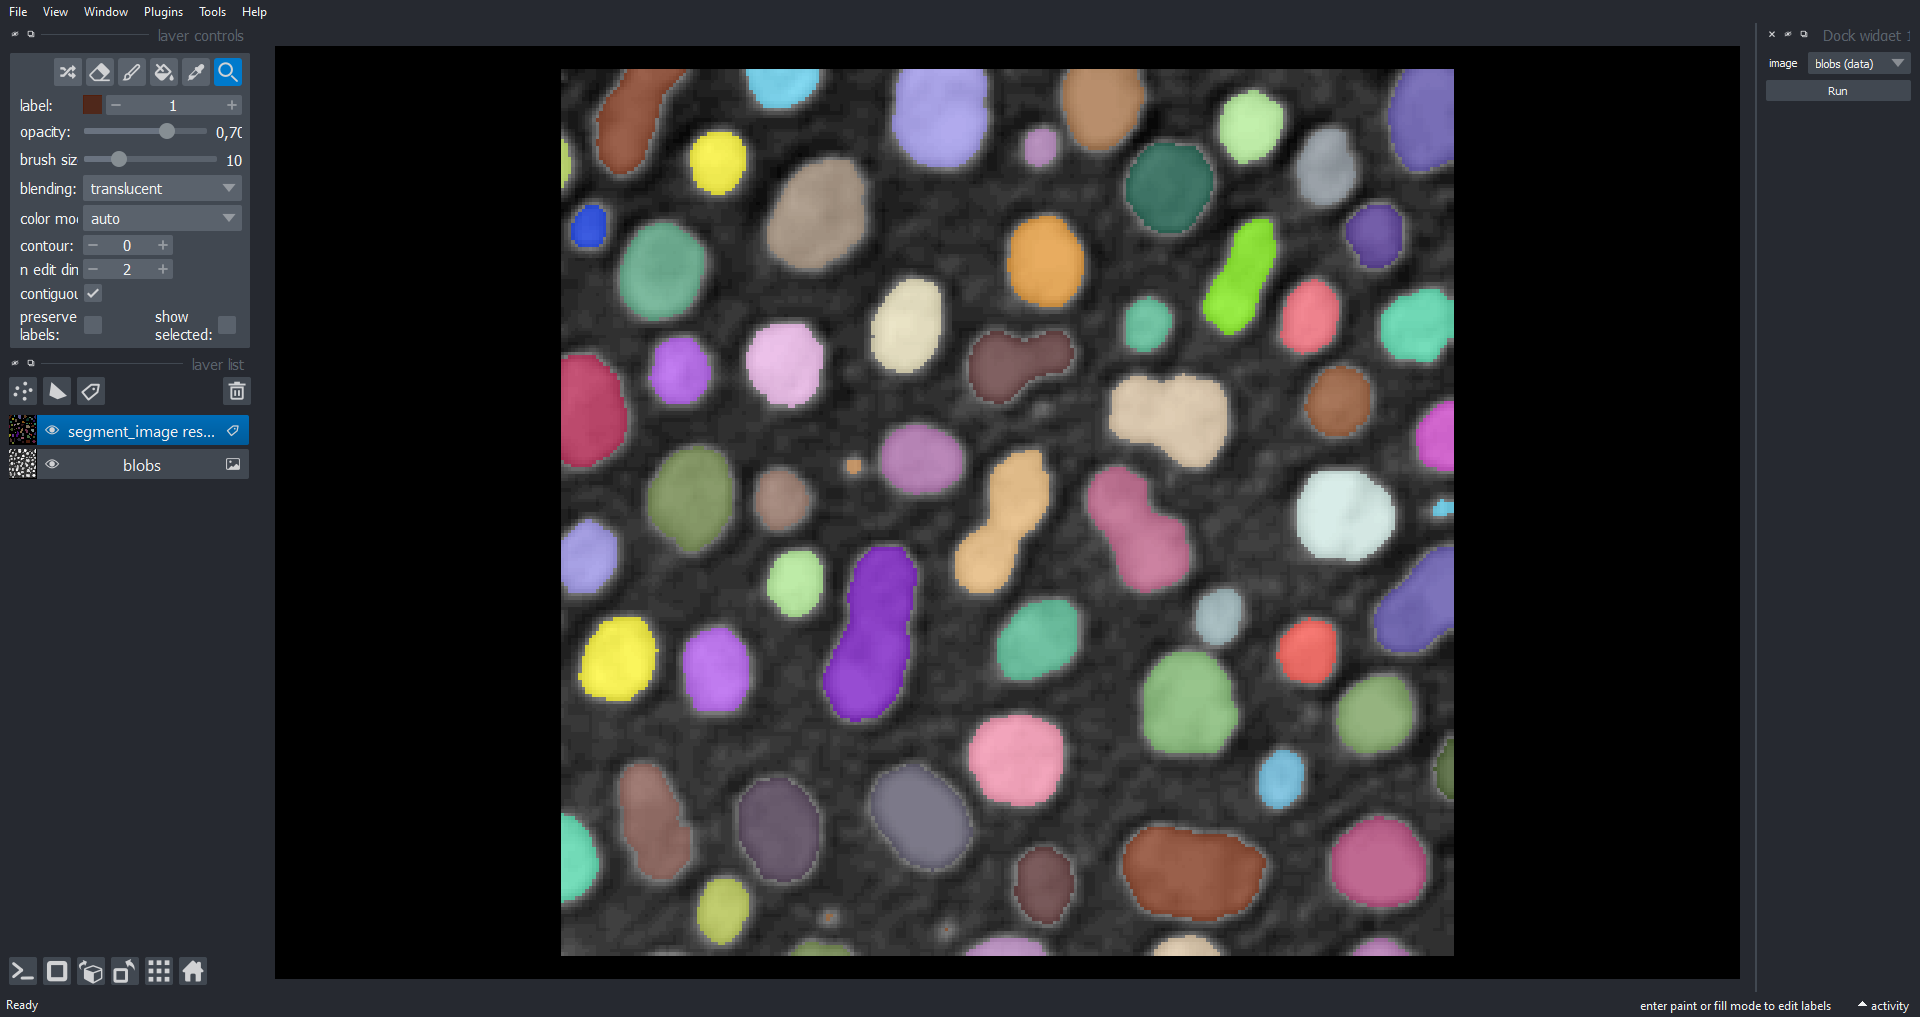

In [4]:
segment_image_widget = magicgui(segment_image) # Make a widget from function
viewer.window.add_dock_widget(segment_image_widget) # Add this widget to the napari viewer
segment_image_widget() # Run the function
nbscreenshot(viewer) # Make a screenshot of napari

## Output layer options

If we want your widget to return a layer with specific name and colormap for example, this con be achieved, but only by using a special napari data type called [LayerDataTuple](https://napari.org/stable/guides/magicgui.html#returning-napari-types-layerdatatuple).

This is basically a tuple that should contain up to three fields, like this:

`(data, dictionary_of_properties, layer_type)`

  1. `data`: the numpy array containing data (typically the image, label image, etc)
  2. `dictionary_of_properties` (optional): layer properties go here, for example:
      * `{'name': 'Output Image', 'colormap': 'magma'}`
  3. `layer_type` (optional, `image` by default): a string of the layer type, it should be one of the following: `'image'`, `'labels'`, `'points'`, `'surface'`, etc.


We will redefine the previous function to return a label image with name 'Output Label Image' and change the opacity to 0.3. To know which properties are available, check the specific layer type attributes, in this case, the [LabelsLayer](https://napari.org/stable/api/napari.layers.Labels.html#napari-layers-labels). We have to indicate that we are now returning a `LayerDataTuple`.

In [15]:
from napari.types import ImageData, LayerDataTuple
def segment_image2(image: ImageData) -> LayerDataTuple:
    """Apply thresholding and connected component analysis"""
    from skimage.filters import threshold_otsu
    from skimage.measure import label
    
    binary = image > threshold_otsu(image)
    label_image = label(binary)
    
    output_tuple = (label_image, # first parameter of the tuple: data
                    {'name': 'Output Label Image', 'opacity': 0.3}, # second parameter of the tuple: layer properties
                    'labels') # third parameter of the tuple: layer type
    
    return output_tuple

Now we add our new widget to napari and try it out.

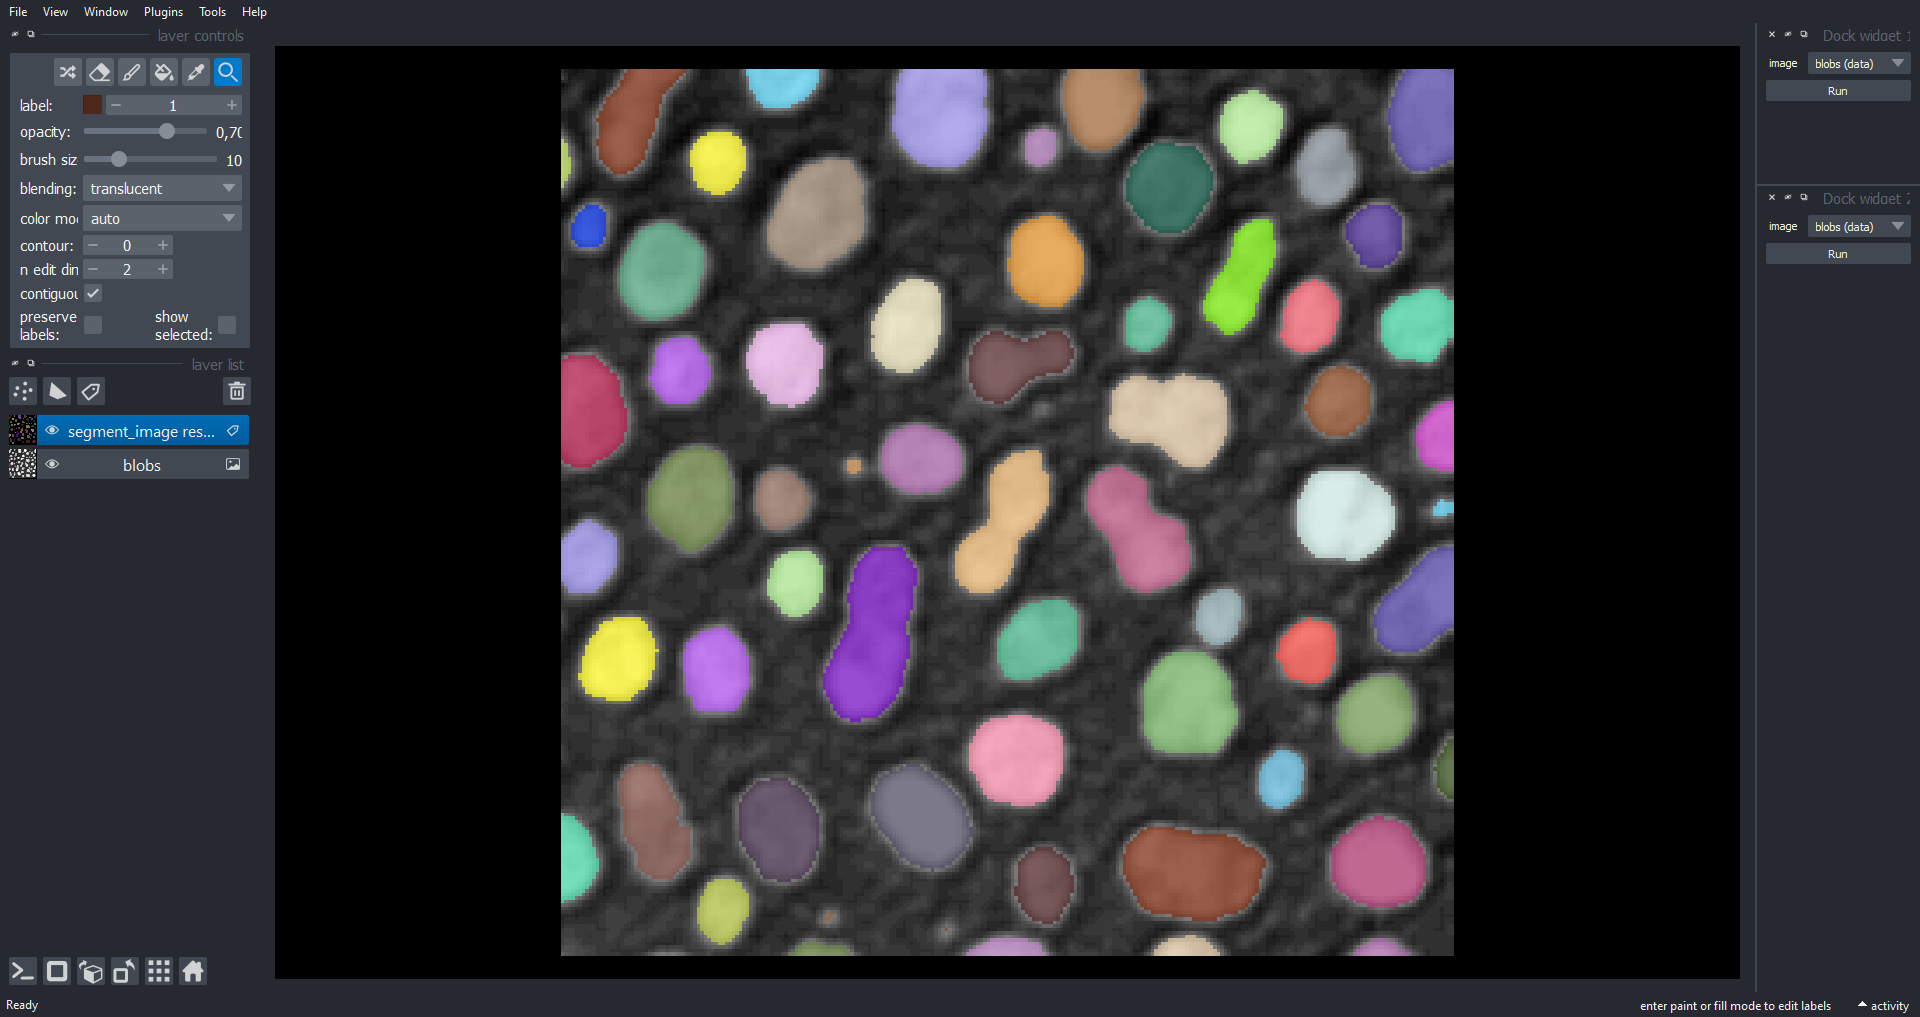

In [7]:
segment_image_widget2 = magicgui(segment_image2) # Make a widget from function
viewer.window.add_dock_widget(segment_image_widget2) # Add this widget to the napari viewer
# segment_image_widget2() # Run the function
nbscreenshot(viewer) # Make a screenshot of napari

## Exercise

Create your own image processing function that receives an image and a boolean variable (maybe other parameters if you like), and returns a different processed image depending if the boolean variable is `True` or `False`.

Add annotations to its arguments. Call it from code and send the output to napari.

Then, generate a widget with magicgui and add the widget to napari. Run the widget from napari. Compare your results.